Import Libraries to use

In [29]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Read Intel Dataset

In [30]:
train_path = "D:/Slash_Product_Image_Classifier/train"
test_path = "D:/Slash_Product_Image_Classifier/test"

image_category = os.listdir('D:/Slash_Product_Image_Classifier/train')

Visualize one image from each class

In [64]:
def plot_images(image_category):
    
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(image_category):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img) / 255
        
        plt.subplot(1,9, i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        
    plt.show()  

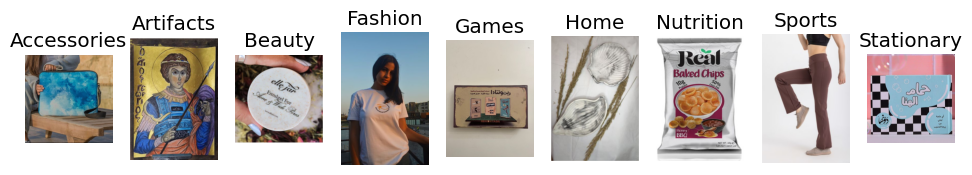

In [65]:
plot_images(image_category)

Apply the suitable Image Preprocessing by using ImageDataGenerator

In [33]:
#data augmentation

#1- train data
train_generator = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_generator.flow_from_directory(
                                                train_path,
                                                target_size = (150,150),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )
#2- test data
test_generator = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = test_generator.flow_from_directory(
                                                test_path,
                                                target_size = (150,150),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )

Found 794 images belonging to 9 classes.
Found 108 images belonging to 9 classes.


CNN Model Building

In [34]:
#model building
cnn_model = Sequential()

#add layers
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu', input_shape = [150,150,3]))

cnn_model.add(MaxPooling2D(pool_size= (2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())

#flatten layer
cnn_model.add(Flatten())

#fully connected cnn
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(9, activation = 'softmax'))
#print model summary
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 87616)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Model compiling

In [35]:
cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

Model Fitting

In [36]:
model_history = cnn_model.fit(train_image_generator,
                             epochs = 8,
                             validation_data = test_image_generator,
                             )

Epoch 1/8
25/25 [==============================] - 63s 3s/step - loss: 2.5621 - accuracy: 0.2544 - val_loss: 1.9896 - val_accuracy: 0.2593
Epoch 2/8
25/25 [==============================] - 53s 2s/step - loss: 1.5733 - accuracy: 0.3942 - val_loss: 1.7017 - val_accuracy: 0.4074
Epoch 3/8
25/25 [==============================] - 47s 2s/step - loss: 1.2018 - accuracy: 0.5655 - val_loss: 1.5111 - val_accuracy: 0.5185
Epoch 4/8
25/25 [==============================] - 51s 2s/step - loss: 0.8741 - accuracy: 0.7078 - val_loss: 1.5295 - val_accuracy: 0.5926
Epoch 5/8
25/25 [==============================] - 50s 2s/step - loss: 0.5424 - accuracy: 0.8224 - val_loss: 1.4143 - val_accuracy: 0.5185
Epoch 6/8
25/25 [==============================] - 72s 3s/step - loss: 0.3062 - accuracy: 0.9144 - val_loss: 1.7187 - val_accuracy: 0.5185
Epoch 7/8
25/25 [==============================] - 74s 3s/step - loss: 0.1438 - accuracy: 0.9761 - val_loss: 1.4832 - val_accuracy: 0.6296
Epoch 8/8
25/25 [==========

Model Performance Plotting

Print the test and train accuracy

In [38]:
print("Test accuracy:", model_history.history['val_accuracy'][-1])
print("Train accuracy:", model_history.history['accuracy'][-1])

Test accuracy: 0.6111111044883728
Train accuracy: 0.98740553855896


Test your model with an image

In [47]:
test_image_path = 'D:/Slash_Product_Image_Classifier/predict/Screenshot 2024-03-15 054209.png'

In [48]:
class_map = dict([v,k] for k,v in train_image_generator.class_indices.items())
print(class_map)

{0: 'Accessories', 1: 'Artifacts', 2: 'Beauty', 3: 'Fashion', 4: 'Games', 5: 'Home', 6: 'Nutrition', 7: 'Sports', 8: 'Stationary'}


In [68]:
import numpy as np
def predictions(test_image_path, actual_label):
    
    #load and preprocessing image
    test_img = image.load_img(test_image_path, target_size = (150,150))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))
    
    #make prediction
    predicted_label = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_label]
    
    
    plt.figure(figsize = (3,3))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')

1/1 [==============================] - 0s 30ms/step


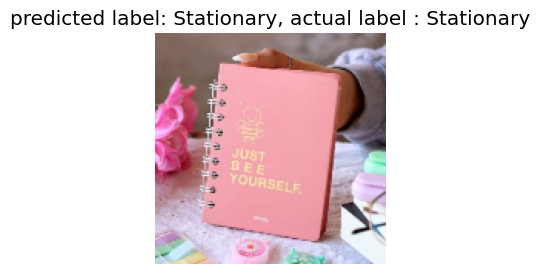

In [69]:
predictions(test_image_path, actual_label = 'Stationary')